In [77]:
# Fill 9275 was the validation fill
# Fill 9279 was the MD that did not actually take place but we have BPM data

#! ls /eos/project/l/lhc-lumimod/MD10703/9279/BPM

#! ls /eos/project/l/lhc-lumimod/MD9407/8957/BPM/Beam1@Turn*

In [5]:
! python -m pip install turn_by_turn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sdds
import turn_by_turn as tbt

In [78]:
path = "/eos/project/l/lhc-lumimod/MD10703/9279/BPM"
#path = "//eos/project/l/lhc-lumimod/MD9407/8957/BPM"
beam = 1

files = os.listdir(f"{path}")

files_B1 = sorted([f"{path}/{i}" for i in files if f"Beam{beam}" in i and "@Turn" in i])
files_B1 = sorted([f"{path}/{i}" for i in files if not i.startswith('.') and f"Beam{beam}" in i and "@Turn" in i])
print(files_B1)
#timestamps = [pd.to_datetime(i, format=f'{path}/Beam{beam}@Turn@%Y_%m_%d@%H_%M_%S_%f.sdds') for i in files_B1]
timestamps =  [pd.to_datetime(i, format=f'{path}/Beam{beam}@Turn@%Y_%m_%d@%H_%M_%S_%f.sdds') for i in files_B1]

#Beam1@BunchTurn@2023_06_16@22_31_33_184.sdds
files_B1 = pd.DataFrame({"files_B1": files_B1, "timestamps": timestamps})
print(files_B1.head(50))

['/eos/project/l/lhc-lumimod/MD10703/9279/BPM/Beam1@Turn@2023_10_19@18_21_16_372.sdds', '/eos/project/l/lhc-lumimod/MD10703/9279/BPM/Beam1@Turn@2023_10_19@18_24_55_604.sdds', '/eos/project/l/lhc-lumimod/MD10703/9279/BPM/Beam1@Turn@2023_10_19@18_31_42_772.sdds', '/eos/project/l/lhc-lumimod/MD10703/9279/BPM/Beam1@Turn@2023_10_19@18_32_11_572.sdds', '/eos/project/l/lhc-lumimod/MD10703/9279/BPM/Beam1@Turn@2023_10_19@18_34_40_162.sdds', '/eos/project/l/lhc-lumimod/MD10703/9279/BPM/Beam1@Turn@2023_10_19@18_37_06_683.sdds', '/eos/project/l/lhc-lumimod/MD10703/9279/BPM/Beam1@Turn@2023_10_19@18_39_25_883.sdds', '/eos/project/l/lhc-lumimod/MD10703/9279/BPM/Beam1@Turn@2023_10_19@18_41_45_083.sdds', '/eos/project/l/lhc-lumimod/MD10703/9279/BPM/Beam1@Turn@2023_10_19@18_43_18_772.sdds', '/eos/project/l/lhc-lumimod/MD10703/9279/BPM/Beam1@Turn@2023_10_19@18_44_28_372.sdds', '/eos/project/l/lhc-lumimod/MD10703/9279/BPM/Beam1@Turn@2023_10_19@18_46_23_483.sdds', '/eos/project/l/lhc-lumimod/MD10703/9279/B

In [29]:
filename = files_B1["files_B1"].iloc[18]
#filename = files_B1["files_B1"].iloc[38]
data_turn: tbt.TbtData = tbt.read(filename, datatype="lhc")
averaged_tbt: tbt.TbtData = tbt.utils.generate_average_tbtdata(data_turn)

In [30]:
filename

'/eos/project/l/lhc-lumimod/MD10703/9279/BPM/Beam1@Turn@2023_10_19@21_50_45_140.sdds'

In [31]:
bpms = data_turn.matrices[0].X.index.unique()
bpms

Index(['BPMYA.4R6.B1', 'BPM.8R6.B1', 'BPM.10R6.B1', 'BPM.12R6.B1',
       'BPM.14R6.B1', 'BPM.16R6.B1', 'BPM.18R6.B1', 'BPM.20R6.B1',
       'BPM.22R6.B1', 'BPM.24R6.B1',
       ...
       'BPM.15R5.B1', 'BPM.17R5.B1', 'BPM.19R5.B1', 'BPM.21R5.B1',
       'BPM.23R5.B1', 'BPM.25R5.B1', 'BPM.27R5.B1', 'BPM.29R5.B1',
       'BPM.31R5.B1', 'BPM.33R5.B1'],
      dtype='object', length=536)

In [32]:
bpms_b1 = [i for i in bpms if ".B1" in i]
bpms_b2 = [i for i in bpms if ".B2" in i]

In [33]:
data_turn.matrices[0].X.T.iloc[0]

BPMYA.4R6.B1   -0.143771
BPM.8R6.B1     -0.117674
BPM.10R6.B1    -0.207393
BPM.12R6.B1    -0.395875
BPM.14R6.B1    -0.131230
                  ...   
BPM.25R5.B1     0.156383
BPM.27R5.B1     0.315897
BPM.29R5.B1     0.256631
BPM.31R5.B1    -0.196617
BPM.33R5.B1    -0.085838
Name: 0, Length: 536, dtype: float64

In [34]:
data_turn.matrices[0].X.loc["BPMSY.4R5.B1"]

0       7.315801
1       7.407008
2       7.417387
3       7.397165
4       7.381273
          ...   
9995    7.426979
9996    7.336745
9997    7.340937
9998    7.355654
9999    7.366212
Name: BPMSY.4R5.B1, Length: 10000, dtype: float64

In [35]:
averaged_tbt.matrices[0].X[0]

BPMYA.4R6.B1   -0.143771
BPM.8R6.B1     -0.117674
BPM.10R6.B1    -0.207393
BPM.12R6.B1    -0.395875
BPM.14R6.B1    -0.131230
                  ...   
BPM.25R5.B1     0.156383
BPM.27R5.B1     0.315897
BPM.29R5.B1     0.256631
BPM.31R5.B1    -0.196617
BPM.33R5.B1    -0.085838
Name: 0, Length: 536, dtype: float64

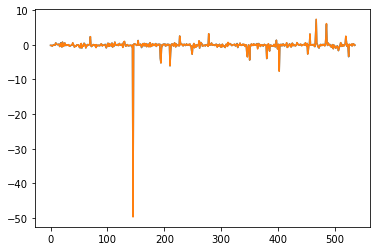

In [36]:
fig, ax = plt.subplots()
orbit_x_total = []
data_ref = data_turn.matrices[0].X.T.iloc[0].values
for turn in range(0,2):
    plt.plot(np.arange(0, 536), data_turn.matrices[0].X.T.iloc[turn].values, ms=3)
    #plt.plot(np.arange(0, 536), data_turn.matrices[0].Y.T.iloc[0].values)
#plt.ylim(-0.3, 0.3)
    

10000
10000


Text(0.5, 0, 'B1H')

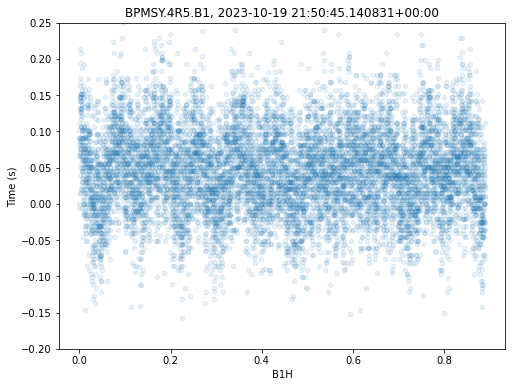

In [38]:
turn_period = 1./11245.5
turns = np.arange(0,10000)
fig,ax = plt.subplots(figsize=(8,6))
turns_s = turns*turn_period
signal = data_turn.matrices[0].X.loc["BPMSY.4R5.B1"]-data_turn.matrices[0].X.loc["BPMSY.4R5.B1"].iloc[0]
#signal = data_turn.matrices[0].X.loc["BPM.8R6.B1"]-data_turn.matrices[0].X.loc["BPM.8R6.B1"].iloc[0]

print(len(signal))
print(len(turns_s))
plt.scatter(turns_s,signal, s=20, alpha=0.1)
plt.ylim(-0.2, 0.25)
plt.title(f"BPMSY.4R5.B1, {pd.Timestamp(data_turn.date)}")
plt.ylabel("Time (s)")
plt.xlabel("B1H")

Text(0.5, 0, 'B1H')

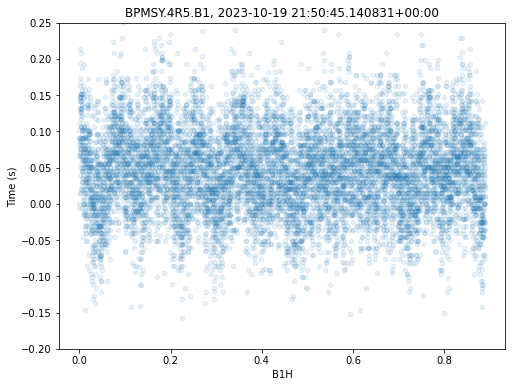

In [39]:
turn_period = 1./11245.5
turns = np.arange(0,10000)
fig,ax = plt.subplots(figsize=(8,6))
turns_s = turns*turn_period
signal = averaged_tbt.matrices[0].X.loc["BPMSY.4R5.B1"]-averaged_tbt.matrices[0].X.loc["BPMSY.4R5.B1"].iloc[0]
plt.scatter(turns_s,signal, s=20, alpha=0.1)
plt.ylim(-0.2, 0.25)
plt.title(f"BPMSY.4R5.B1, {pd.Timestamp(data_turn.date)}")
plt.ylabel("Time (s)")
plt.xlabel("B1H")

In [40]:
data_turn.matrices[0].X
np.where(bpms == "BPMSY.4R5.B1")

(array([467]),)

In [41]:
if 0:
    for counter, bpm in enumerate(bpms):
        turn_period = 1./11245.5
        turns = np.arange(0,10000)
        fig,ax = plt.subplots(figsize=(8,6))
        turns_s = turns*turn_period
        signal = data_turn.matrices[0].X.loc[bpm]-data_turn.matrices[0].X.loc[bpm].iloc[0]
        plt.scatter(turns_s,signal, s=20, alpha=0.1)
        plt.ylim(-0.2, 0.25)
        plt.title(bpm)
        plt.xlabel("Time (s)")
        plt.ylabel("B1H")
        fig.savefig(f"plots/Val_{counter}.png")
        plt.close("all")

In [42]:
signals = [((data_turn.matrices[0].X).T)[f'{i}'] for i in bpms][1].values   # extract the BPMs in an array separately for all turns
signals  = [((data_turn.matrices[0].X).T)[f'{i}'] for i in bpms]

Text(0.5, 0, 'B1H')

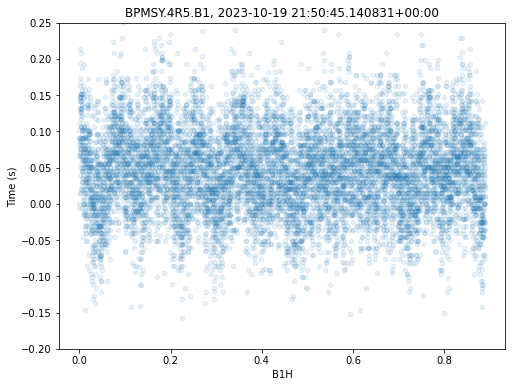

In [43]:
turn_period = 1./11245.5
turns = np.arange(0,10000)
fig,ax = plt.subplots(figsize=(8,6))
turns_s = turns*turn_period

signal = data_turn.matrices[0].X.loc["BPMSY.4R5.B1"]-data_turn.matrices[0].X.loc["BPMSY.4R5.B1"].iloc[0]
#signal = data_turn.matrices[0].X.loc["BPM.14R6.B1"]-data_turn.matrices[0].X.loc["BPM.14R6.B1"].iloc[0]

    
plt.scatter(turns_s,signal, s=20, alpha=0.1)
plt.ylim(-0.2, 0.25)
plt.title(f"BPMSY.4R5.B1, {pd.Timestamp(data_turn.date)}")
plt.ylabel("Time (s)")
plt.xlabel("B1H")

In [44]:
import numpy as np
from scipy.signal import firwin, lfilter
import matplotlib.pyplot as plt
# Define filter parameters
fs = 11245.5  # Sampling frequency in Hz
cutoff_frequency = 15  # Cutoff frequency in Hz
num_taps = 101  # Number of filter taps (odd for linear phase)

# Design the linear phase FIR filter using firwin
filter_coefficients = firwin(num_taps, cutoff_frequency, fs=fs, pass_zero=True)
filtered_signal = lfilter(filter_coefficients, 1.0, signal)
filtered_signals = [lfilter(filter_coefficients, 1.0, signal) for signal in signals]


#np.arange(0,bpms, 100)


(array([2]),)


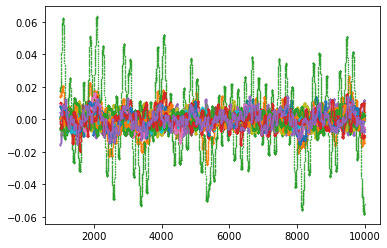

In [46]:
color = ['b', 'r', 'g']
max_all =[]
for i in np.arange(465, 480, 1):
    plt.scatter(turns[1000:], (filtered_signals[i][1000:]-np.mean(filtered_signals[i][1000:])), label=f'{i}', s = 0.2)
    max_v = np.max(abs(filtered_signals[i][1000:]-np.mean(filtered_signals[i][1000:])))
    max_all.append(max_v)

#plt.scatter(turns[1000:], (filtered_signal - np.mean(filtered_signal))[1000:], s = 0.2)
print(np.where(max_all == max(max_all)))
#plt.legend()

In [54]:
import numpy as np
from scipy.signal import firwin, lfilter
import matplotlib.pyplot as plt
# Define filter parameters
fs = 11245.5  # Sampling frequency in Hz
cutoff_frequency = 100  # Cutoff frequency in Hz
num_taps = 10  # Number of filter taps (odd for linear phase)

# Design the linear phase FIR filter using firwin
filter_coefficients = firwin(num_taps, cutoff_frequency, fs=fs, pass_zero=True)
filtered_signal = lfilter(filter_coefficients, 1.0, signal)



In [55]:
len(data_turn.matrices[0].X) #all BPMs
data_turn.matrices[0].X

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
BPMYA.4R6.B1,-0.143771,-0.149531,-0.068658,-0.166847,-0.135097,-0.143743,-0.149524,-0.132179,-0.103291,-0.094675,...,-0.048422,-0.112006,-0.123559,-0.169688,-0.123561,-0.062880,-0.123492,-0.140813,-0.132239,-0.094657
BPM.8R6.B1,-0.117674,-0.103466,-0.127166,-0.101080,-0.098724,-0.103385,-0.089248,-0.112943,-0.103445,-0.089201,...,-0.101056,-0.115310,-0.063121,-0.103473,-0.098674,-0.089239,-0.105703,-0.148523,-0.143777,-0.150863
BPM.10R6.B1,-0.207393,-0.193570,-0.216609,-0.156691,-0.202783,-0.198178,-0.225823,-0.188954,-0.200483,-0.186648,...,-0.182040,-0.156693,-0.175130,-0.186651,-0.170518,-0.244271,-0.241964,-0.191270,-0.218917,-0.177435
BPM.12R6.B1,-0.395875,-0.379470,-0.407550,-0.405206,-0.353829,-0.379498,-0.388856,-0.367833,-0.360814,-0.349162,...,-0.342149,-0.339808,-0.363171,-0.342149,-0.360816,-0.328100,-0.374832,-0.374831,-0.379532,-0.388882
BPM.14R6.B1,-0.131230,-0.185728,-0.162032,-0.214082,-0.188082,-0.195133,-0.126505,-0.176262,-0.126460,-0.157183,...,-0.145436,-0.138353,-0.097962,-0.124086,-0.192779,-0.112231,-0.164361,-0.164405,-0.199941,-0.114645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BPM.25R5.B1,0.156383,0.156385,0.158722,0.165803,0.125754,0.163452,0.135181,0.121057,0.135170,0.139939,...,0.097533,0.113998,0.097528,0.123401,0.151654,0.146962,0.165810,0.161113,0.125810,0.151715
BPM.27R5.B1,0.315897,0.322911,0.273894,0.336896,0.313565,0.343923,0.343955,0.311329,0.358006,0.313545,...,0.304210,0.330001,0.322923,0.322910,0.325232,0.308880,0.280897,0.306533,0.301922,0.322868
BPM.29R5.B1,0.256631,0.213823,0.237647,0.237636,0.154474,0.163955,0.204354,0.197201,0.201982,0.232882,...,0.220991,0.178228,0.261415,0.256641,0.254320,0.218632,0.287590,0.275723,0.232928,0.190151
BPM.31R5.B1,-0.196617,-0.182760,-0.203562,-0.198948,-0.242767,-0.196614,-0.219694,-0.155095,-0.192012,-0.113553,...,-0.159708,-0.150486,-0.134320,-0.201252,-0.166639,-0.178181,-0.175873,-0.141230,-0.161998,-0.166625


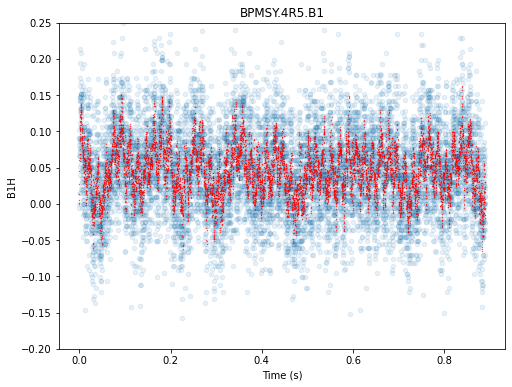

In [57]:
turn_period = 1./11245.5
turns = np.arange(0,10000)
fig,ax = plt.subplots(figsize=(8,6))
turns_s = turns*turn_period
signal = data_turn.matrices[0].X.loc["BPMSY.4R5.B1"]-data_turn.matrices[0].X.loc["BPMSY.4R5.B1"].iloc[0]
plt.scatter(turns_s,signal, s=20, alpha=0.1)
plt.ylim(-0.2, 0.25)
plt.title("BPMSY.4R5.B1")
plt.xlabel("Time (s)")
plt.ylabel("B1H")


plt.scatter(turns_s, filtered_signal, c='r', s=0.1)


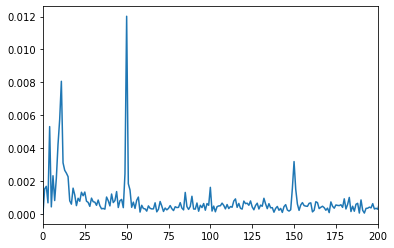

[9950]
[0.08, 10, -1.5707963267948966, 0.045564560046744126]
0.04000000000000001 11.383284159984907 1.7009272643005353


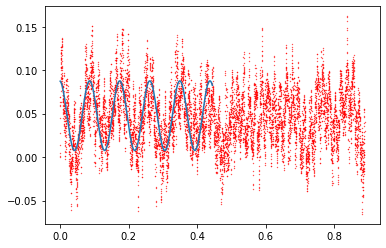

In [75]:
from scipy.optimize import curve_fit

frev = 11245.5
def sine(t, A, f, phase, offset):
    return A * np.sin(2 * np.pi * f *t + phase) + offset


fft = np.fft.fft(filtered_signal-np.mean(filtered_signal))
fft = fft/len(fft)

freqs = np.fft.fftfreq(len(fft))

idx = np.where(fft == max(fft))[0]
plt.plot(abs(fft))
plt.xlim(0,200)
plt.show()

initial_a = max(fft)
print(np.where(fft == initial_a)[0])
initial_f = freqs[idx]

initial_guess = [0.08, 10, -np.pi/2, np.mean(filtered_signal)]

print(initial_guess)

frequency_bound = 1.5  # Adjust as needed
bounds = (
    [0.04, 10 - frequency_bound, -np.inf, -np.inf],
    [np.inf, 10 + frequency_bound, np.inf, np.inf]
)

# Perform curve fitting with bounds
fit, _ = curve_fit(sine, turns_s[:5000], filtered_signal[:5000], p0=initial_guess, bounds=bounds)


plt.scatter(turns_s, filtered_signal, c='r', s=0.1)


plt.plot(turns_s[:5000], sine(turns_s[:5000], fit[0], fit[1], fit[2], fit[3]))
print(fit[0], fit[1], np.array(fit[2])%np.pi)


#plt.plot(np.arange(len(turns_s)), sine(turns_s/frev, fit[0], fit[1], fit[2]))